# Answer Sheet for Question 3

In this file, I used a fixed example to replicate Table 1 of ledoit and wolf(2017) paper. I cannot find the history stock list of the S&P 500 and the current components of the S&P500 do not have all the data I need from 1 Jan 1972 to 31 Dec 2011 (10094 trading days). There are only 26 stocks that have complete historical data of 10094 days, so I only use 1 time period of 271 returns.

I use yfinance package to get the stock data and use numpy, pandas, sklearn to process it.

In [523]:
import yfinance as yf
import numpy as np
import pandas as pd
def showmatrixinfo(matrix):
    print("Matrix shape: ",np.shape(matrix))
    print(matrix)

    #######This function is only for testing purpose.

## Stock selection and data acquisition

I randomly pick 100 stocks for N=100 and save it to a csv file, then read and request the data from 1997-3-5 to 1998-4-1. If I cannot get full historical data of 272 days of one stock, I will pop out this stock and randomly replace it with another one.

The time period "1997-3-5 to 1998-4-1" was picked by me manually. I looked at the historical S&P 500 index and the trend seems steady in this period. so I can assume that the distributions in these 272 days remain the same.

This part(yfinance) requires internet connection. yfinance seems not working in the Chinese mainland. I actually used SCRP of the department to do all the coding. I run this file, save data, and download it to my local computer to double check. If yfinance is not available, you can jump to the next part after loading the return data which is already processed.

In [337]:
def openfile(filename):
    a=open(filename,'r')
    b=a.readlines()
    a.close()
    return b

stock=openfile("Fix100comp.csv")
stocklist=stock[0].replace("\n","").split(",")
print(stocklist)


['BA', 'BMY', 'CPB', 'CAT', 'CVX', 'KO', 'CL', 'COP', 'CVS', 'DE', 'DTE', 'EIX', 'ETR', 'EXC', 'XOM', 'F', 'GD', 'HAL', 'HIG', 'HSY', 'IBM', 'IP', 'KMB', 'KR', 'MRK', 'NSC', 'PEP', 'PFE', 'PPG', 'PG', 'PEG', 'SEE', 'SO', 'UNP', 'XEL', 'ABT', 'HON', 'AEP', 'SHW', 'CMI', 'EMR', 'SLB', 'CSX', 'CLX', 'GIS', 'NEM', 'MCD', 'LLY', 'BAX', 'BDX', 'JNJ', 'GPC', 'HPQ', 'WMB', 'JPM', 'IFF', 'AXP', 'BAC', 'CI', 'DIS', 'DUK', 'LNC', 'TAP', 'NEE', 'WFC', 'MMM', 'INTC', 'TGT', 'TXT', 'VFC', 'WBA', 'AIG', 'FDX', 'PCAR', 'ADP', 'MAS', 'GWW', 'ADM', 'WMT', 'SNA', 'SWK', 'MO', 'AAPL', 'OXY', 'CAG', 'BBWI', 'VZ', 'T', 'LOW', 'PHM', 'HES', 'LMT', 'HAS', 'BALL', 'APD', 'NUE', 'PKI', 'NOC', 'CNP', 'TJX']


In [26]:
########This is only for test. If yfinance is not available, you can jump to next part after loading the already processed return data.
stock=stocklist[0]
print(yf.download(i, start="1999-1-5", end="1999-1-6"))                                            ##test
print(yf.download(i, start="1999-1-5", end="1999-1-6").iloc[:,4])

[*********************100%***********************]  1 of 1 completed
                Open     High       Low   Close  Adj Close    Volume
Date                                                                
1999-01-05  3.554688  3.71875  3.546875  3.6875   2.816108  10439200
[*********************100%***********************]  1 of 1 completed
Date
1999-01-05    2.816108
Name: Adj Close, dtype: float64


In [20]:
########Check data availability
for i in stocklist:
    data = yf.download(i, start="1997-3-5", end="1998-4-2")
    print(data.shape)   #Check data availability

[*********************100%***********************]  1 of 1 completed
(272, 6)
[*********************100%***********************]  1 of 1 completed
(272, 6)
[*********************100%***********************]  1 of 1 completed
(272, 6)
[*********************100%***********************]  1 of 1 completed
(272, 6)
[*********************100%***********************]  1 of 1 completed
(272, 6)
[*********************100%***********************]  1 of 1 completed
(272, 6)
[*********************100%***********************]  1 of 1 completed
(272, 6)
[*********************100%***********************]  1 of 1 completed
(272, 6)
[*********************100%***********************]  1 of 1 completed
(272, 6)
[*********************100%***********************]  1 of 1 completed
(272, 6)
[*********************100%***********************]  1 of 1 completed
(272, 6)
[*********************100%***********************]  1 of 1 completed
(272, 6)
[*********************100%***********************]  1 of 1 compl

In [23]:
######Generate price matrix(N,272),this will yields 271 returns from 1997-3-6 to 1998-4-1. yfinance will not return the data of the ending date.

Pr=list()
for i in stocklist:
    data = yf.download(i, start="1997-3-5", end="1998-4-2")
    ls=list(data.iloc[:,4])
    Pr.append(ls)
Pr=np.array(Pr)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

In [348]:
print(np.shape(Pr))        #check
print(Pr[0,0])  ##Correct

#Save file.
np.savetxt("Price.txt", Pr, delimiter=",")

(100, 272)
32.631103515625


## Data processing and calculating returns.
First, I calculate the return matrix of 271 days, then divide it into two parts: 270 days for estimating parameters, and 21 days for testing the results.

The risk-free rate is from Ken French's Data Library, the same as FAMA-FRENCH covariance estimates. In the paper by Ledoit and Wolf(2017), they annualize returns linearly instead of using compound interest. So, I simply divided the risk-free rate by 250 to calculate the daily risk-free rate.

In [25]:
Y1=Pr[:,1:]               ##Create a matrix only 271 days(day2-day272).
Y2=Pr[:,:-1]               ##day1 to day271
Yt=Y1/Y2-1
print(Yt)                   #Yt is the return matrix of 100 stocks(271days)

[[-0.00238916  0.01916199 -0.00235089 ... -0.01463477  0.03217799
   0.01199075]
 [-0.03610098  0.          0.01685407 ...  0.00678584  0.02267097
   0.02119442]
 [ 0.01386943  0.00684016  0.02309794 ...  0.0042062  -0.00711211
  -0.01652012]
 ...
 [ 0.00851838  0.01013458  0.00334456 ...  0.00120744  0.03679161
   0.01803369]
 [-0.0374327   0.          0.         ...  0.00668137  0.0176998
   0.0021737 ]
 [ 0.          0.00284913  0.         ... -0.03137801  0.02676057
   0.03017811]]


In [296]:
yt_est=Yt[:,:250]                     #yt for estimating covariance matrix(250days)
yt_test=Yt[:,250:]                    #yt for testing the portfolio(21days)
print(np.shape(yt_est))               
print(np.shape(yt_test)) 

(100, 250)
(100, 21)


In [276]:
##save data

np.save("Fix100Stock_est_matrix.npy",yt_est) #save matrix
np.save("Fix100Stock_test_matrix.npy",yt_test)
np.savetxt("Fix100_Yt_est.csv",yt_est,delimiter=",")

### All the codes below do not need internet connection.

In [529]:
#Load and check data

yt_est=np.load("Fix100Stock_est_matrix.npy")
yt_test=np.load("Fix100Stock_test_matrix.npy")

FFdata = pd.read_csv('F-F_Research_Data_Factors_daily_Fix100.csv')
rf_rate=FFdata.loc[250:,"RF"].to_numpy()
rf_daily=rf_rate/250                          


print(np.shape(yt_est))               
print(np.shape(yt_test)) 
print(np.shape(rf_daily))
print(yt_test)

(100, 250)
(100, 21)
(21,)
[[ 0.01789964 -0.01992981  0.00358893 ... -0.01463477  0.03217799
   0.01199075]
 [-0.01161362 -0.01051343  0.02499983 ...  0.00678584  0.02267097
   0.02119442]
 [-0.00213677 -0.00535299  0.01399348 ...  0.0042062  -0.00711211
  -0.01652012]
 ...
 [-0.00507116  0.00111554  0.02228419 ...  0.00120744  0.03679161
   0.01803369]
 [ 0.          0.00722904  0.01435389 ...  0.00668137  0.0176998
   0.0021737 ]
 [-0.01433089 -0.00484653  0.01623402 ... -0.03137801  0.02676057
   0.03017811]]


## Covariance Matrix Estimation

I used different approaches to estimate the covariance matrix then define a function "test_result" to calculate the portfolio weight w, the return of 21 days and other estimators, then save it to a list.

### 1/N
This is 1/N approach. It assumes that every stock is not correlated. The covariance matrix is set to be I(N, N), which will yield equal portfolio weight as expected.

In [544]:
##     1/N Estimation

N=100
omega=np.identity(100)
print(omega)

def test_result(omega,method):
    ### Use estimated covariance matrix to calculate w
    
    Omega= np.matrix(omega)
    w=(Omega.I@np.ones((100,1)))/(np.ones((1,100))@Omega.I@np.ones((100,1)))
    print("w:")
    print(w.T)
    
    ###########calculate payoff and excess payoff(ri-rf)
    
    payoff=w.T@yt_test*100
    
    exc_payoff=payoff-rf_daily
    print(np.shape(exc_payoff))
    ############Annualize:
    
    AV=exc_payoff.mean()*250
    SD=exc_payoff.std()*pow(250,.5)
    SR=AV/SD

    print("\n"+method+" result:")
    print("AV: {:.4f}".format(AV))
    print("SD: {:.4f}".format(SD))
    print("SR: {:.4f}".format(SR))
    return [AV,SD,SR]

result1N=test_result(omega,"1/N")
print(result1N)

[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
w:
[[0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01
  0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01
  0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01
  0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01
  0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01
  0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01
  0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01
  0.01 0.01]]
(1, 21)

1/N result:
AV: 54.8711
SD: 8.5095
SR: 6.4482
[54.87108271762652, 8.509538561633054, 6.448185447448784]


### Sample
This is the Sample covariance matrix approach, the classical method for Markowitz's MPT.

In [545]:
##     Sample Covariance Estimation
omega=np.cov(yt_est)
print("Matrix shape:")
print(np.shape(omega))
print(omega)

resultSamp=test_result(omega,"Samp")
print(resultSamp)

Matrix shape:
(100, 100)
[[4.65997962e-04 1.63687852e-04 1.32154780e-04 ... 1.20673976e-04
  6.87962711e-05 1.69091373e-04]
 [1.63687852e-04 5.05786101e-04 2.03311377e-04 ... 1.04776241e-04
  8.67511550e-05 1.68726755e-04]
 [1.32154780e-04 2.03311377e-04 3.68006616e-04 ... 1.01790305e-04
  5.12305790e-05 1.23077641e-04]
 ...
 [1.20673976e-04 1.04776241e-04 1.01790305e-04 ... 4.23508458e-04
  3.99773908e-05 9.01986996e-05]
 [6.87962711e-05 8.67511550e-05 5.12305790e-05 ... 3.99773908e-05
  2.24052101e-04 5.58509147e-05]
 [1.69091373e-04 1.68726755e-04 1.23077641e-04 ... 9.01986996e-05
  5.58509147e-05 5.87914599e-04]]
w:
[[ 0.00782784 -0.00789738 -0.09516237  0.01701728  0.02315577 -0.05797588
   0.00686327  0.02343564  0.00105536  0.00082359  0.13517302 -0.05073402
   0.01183255  0.0154362  -0.07560041  0.01889112  0.04293443  0.03592357
   0.04300626 -0.02095569  0.01702989 -0.04232427 -0.00591592 -0.00339875
   0.0185084  -0.05853328 -0.00148419 -0.00536898 -0.00245309 -0.02344836
  

### Lin
This is the linear shrinkage approach. The matrix is given by the linear shrinkage estimator of Ledoit and Wolf(2004). While I googled the method, I found out that sklern package has this method, which will return the matrix and coefficient.

In [546]:
##     Lin(Ledoit-Wolf 2004 methpd) shrinkage Estimation
from sklearn.covariance import ledoit_wolf

omega=ledoit_wolf(yt_est.T)[0]
print("Matrix shape:")
print(np.shape(omega))
print(omega)

resultLin=test_result(omega,"Lin")
print(resultLin)

Matrix shape:
(100, 100)
[[4.54553244e-04 1.49775906e-04 1.20922852e-04 ... 1.10417810e-04
  6.29492276e-05 1.54720178e-04]
 [1.49775906e-04 4.90959761e-04 1.86031800e-04 ... 9.58712347e-05
  7.93781133e-05 1.54386550e-04]
 [1.20922852e-04 1.86031800e-04 3.64890251e-04 ... 9.31390750e-05
  4.68764560e-05 1.12617186e-04]
 ...
 [1.10417810e-04 9.58712347e-05 9.31390750e-05 ... 4.15674953e-04
  3.65796842e-05 8.25326486e-05]
 [6.29492276e-05 7.93781133e-05 4.68764560e-05 ... 3.65796842e-05
  2.33170532e-04 5.11041061e-05]
 [1.54720178e-04 1.54386550e-04 1.12617186e-04 ... 8.25326486e-05
  5.11041061e-05 5.66108100e-04]]
w:
[[ 0.00494146 -0.01270759 -0.06927698  0.00851496  0.01040177 -0.04685151
   0.00359105  0.03074149  0.01736969  0.00644099  0.08450095 -0.01903434
   0.02569077  0.02607242 -0.06068882  0.0170703   0.04465801  0.02245166
   0.03334027 -0.00903853  0.01280188 -0.03183679 -0.0098643   0.00321426
   0.02038573 -0.03732696 -0.00243112 -0.01685952 -0.01737469 -0.01633966
  

### NonLin
This is the Non-Linear shrinkage estimate procedure. I followed the procedure of the reference paper. The estimator of s(x) is tricky. I cannot find the exact answer to it. The appendix of the paper provides more details but still, it's too obscure to me. 

I calculated the eigenvalue and eigenvector of the sample covariance matrix. I found out that all the eigenvalues are greater than 0 so I typed in the formula of dt_est. the dt_est needs the Bona fide estimator of s(x), this is the only part missing.

Atfer calculate the dt_est I can generate the diagonal matrix Dt_est and calculate the shrinked covariance matrix.

In [547]:
##     NonLin shrinkage Estimation
from sympy import *

##get eigenvalue and vector
eigenvalue, eigenvector = np.linalg.eig(np.cov(yt_est))
print(eigenvalue>0)          

##   Test reult: All eigenvalues are greater than 0
print(eigenvalue)

Ut=np.mat(eigenvector)

######## test ####    Ut is verified.
print(np.allclose(Ut.T,Ut.I))

####Shrink eigenvalue calculation(unfinished):

c=0.4                   #c=N/T according to bona fide

def s(eigenvalue):             ## This is the estimator of the Stieltjes Transform s(x)
    s = symbols('s')
    solve(,s)  ##This is the missing part of my replication.....
    
    return s
    
#generate diagonal matrix dt_est:

#dt_est[i]=1/(eigenvalue[i]*(abs(s(eigenvalue[i])))^2)  
#Dt_est=np.diag(dt_est)      #This is the diagonal matrix of Dt estimate.


'''
omega=Ut@Dt_est@Ut.T

result_NonLin=test_result(omega,"NonLin")
'''

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True]
[1.04849396e-02 2.07206190e-03 1.22446716e-03 1.05311187e-03
 8.50372217e-04 8.01669911e-04 7.26188092e-04 6.61691751e-04
 6.40603148e-04 5.79258139e-04 5.53521133e-04 5.21068570e-04
 5.13918365e-04 4.77888500e-04 4.64027697e-04 4.32263165e-04
 4.30368419e-04 4.17645204e-04 3.89741055e-04 3.81923847e-04
 3.67552165e-04 3.56383301e-04 3.44262903e-04 3.31074478e-04
 3.22949962e-04 3.194213

'\nomega=Ut@Dt_est@Ut.T\n\nresult_NonLin=test_result(omega,"NonLin")\n'

### SF
This is the single-factor model. First, I generate factors using an equal-weighted portfolio. Then, I calculate the factor variance and covariance of the factor and single stock. I also saved the data and run it in STATA to check if I'm right. The covariance of stock i and j is equal to $ \frac{beta1 * beta2}{var(factor)} $ if $ i \neq j $, the diagonals need to be replaced by var(ri) or add the variance of residuals.  (I'm not familiar with LATEX, still working on it!)

In [548]:
##     Single factor estimation
##   First, estimate SigmaF=Cov(betai,betaj)

##   Generate Factor
equalw=np.array([[0.01]*100])
print("equal portfolio: ",np.shape(equalw))
factor=equalw@yt_est
print("Factor matrix shape: ",np.shape(factor))


##estimate SigmaF
var_f=np.var(factor,ddof=1)      #variance of factor,

np.savetxt("SF_factor.csv",factor,delimiter=",")

##compute cov(Ri,Rf),the covariance of stocks and factor
var_if=np.cov(yt_est,factor)[-1,:-1]
var_if=np.matrix(var_if)          #convert to 1X100 matrix



SigmaF=var_if.T*var_if/var_f  

##The elements of diagonal need to change to var(ri) ,or betai^2*var_f + var(residual)

for i in range(100):
    SigmaF[i,i]=np.cov(yt_est)[i,i]


showmatrixinfo(SigmaF)    ####Seems correct


resultSF=test_result(SigmaF,"SF")



equal portfolio:  (1, 100)
Factor matrix shape:  (1, 250)
Matrix shape:  (100, 100)
[[4.65997962e-04 1.82112016e-04 1.64998702e-04 ... 1.01471267e-04
  7.28569689e-05 1.56005464e-04]
 [1.82112016e-04 5.05786101e-04 1.92200615e-04 ... 1.18199960e-04
  8.48682692e-05 1.81724739e-04]
 [1.64998702e-04 1.92200615e-04 3.68006616e-04 ... 1.07092549e-04
  7.68930823e-05 1.64647818e-04]
 ...
 [1.01471267e-04 1.18199960e-04 1.07092549e-04 ... 4.23508458e-04
  4.72878781e-05 1.01255480e-04]
 [7.28569689e-05 8.48682692e-05 7.68930823e-05 ... 4.72878781e-05
  2.24052101e-04 7.27020323e-05]
 [1.56005464e-04 1.81724739e-04 1.64647818e-04 ... 1.01255480e-04
  7.27020323e-05 5.87914599e-04]]
w:
[[-0.01158836 -0.02306372 -0.02402899 -0.00370027 -0.00331666 -0.0299433
  -0.01534953  0.02758373  0.00984259 -0.00257735  0.08203581  0.04367178
   0.06361238  0.03669402 -0.01863309  0.0049561   0.03350595 -0.00591081
   0.01912271 -0.00575308 -0.01568702 -0.00409937 -0.00500743  0.00762265
  -0.01274834 -0.0

### FF
In the Fama and French model, I also downloaded the data from Ken French's Data Library as Ledoit and Wolf did.

In [549]:
##     FAMA FRENCH estimation

#####First, Generate 3-factors array.
import pandas as pd
FFdata = pd.read_csv('F-F_Research_Data_Factors_daily_Fix100.csv')
index=["Mkt-RF","SMB","HML"]
FFfactors=FFdata.loc[:249,index].to_numpy()
#showmatrixinfo(FFfactors)                #####Done

from sklearn.linear_model import LinearRegression

LG=LinearRegression()

LG.fit(FFfactors,yt_est.T)      ##FFfactor matirx is a (250,3) matrix!
betas=LG.coef_
print("Beta matrix: ",np.shape(betas))

var_ff=np.cov(FFfactors.T)      ##Covariance of FAMA FRENCH 3 Factor model.

SigmaF=betas@var_ff@betas.T

###As same as SF, the diagonal need add residual,or replace by var(Ri)

for i in range(100):
    SigmaF[i,i]=np.cov(yt_est)[i,i]
    
print("SigmaF: ")
showmatrixinfo(SigmaF)

resultFF=test_result(SigmaF,"FF")




Beta matrix:  (100, 3)
SigmaF: 
Matrix shape:  (100, 100)
[[4.65997962e-04 1.81657701e-04 1.58188346e-04 ... 9.14582713e-05
  6.18714905e-05 1.49341589e-04]
 [1.81657701e-04 5.05786101e-04 1.88232657e-04 ... 1.09899032e-04
  7.61206669e-05 1.69057593e-04]
 [1.58188346e-04 1.88232657e-04 3.68006616e-04 ... 9.76882145e-05
  6.98722984e-05 1.50011922e-04]
 ...
 [9.14582713e-05 1.09899032e-04 9.76882145e-05 ... 4.23508458e-04
  4.13773752e-05 8.71241591e-05]
 [6.18714905e-05 7.61206669e-05 6.98722984e-05 ... 4.13773752e-05
  2.24052101e-04 6.03188208e-05]
 [1.49341589e-04 1.69057593e-04 1.50011922e-04 ... 8.71241591e-05
  6.03188208e-05 5.87914599e-04]]
w:
[[-0.00585698 -0.02128737 -0.02309375 -0.00118393 -0.00131329 -0.03139742
  -0.01006522  0.02712724  0.00972651  0.003003    0.07766524  0.03425162
   0.06072673  0.03405158 -0.01084858 -0.00914393  0.03725362 -0.00071683
   0.00899339 -0.00621549 -0.00516377 -0.00790941 -0.00377452  0.00597547
  -0.01203261  0.00153645 -0.00334065 -0.02

### POET
This is the POET estimation of covariance matrix by Fan et al. (2013). I use PCA from sklearn to generate 5 factors

In [554]:
### POET estimation
from sklearn.decomposition import PCA, FactorAnalysis
from sklearn import preprocessing
from sklearn import datasets

print("generating components:")
pca = PCA(n_components=5, copy=True)
pca.fit(yt_est)
factors=pca.components_
print('PCA Componets:\n', pca.components_)
print(np.shape(pca.components_))
print('\nEigenvalues:', pca.explained_variance_)
print('Variance explaination:', pca.explained_variance_ratio_)
print("Add up: ",np.sum(pca.explained_variance_ratio_))


##Regression:
from sklearn.linear_model import LinearRegression

print("\nRegression:")
LG2=LinearRegression()

LG2.fit(factors.T,yt_est.T)
betas=LG2.coef_
print("Beta matrix: ",np.shape(betas))

var_fs=np.cov(factors)

SigmaF=betas@var_fs@betas.T

###As same as SF, the diagonal need add residual,or replace by var(Ri)

for i in range(100):
    SigmaF[i,i]=np.cov(yt_est)[i,i]
    
showmatrixinfo(SigmaF)

resultPOET=test_result(SigmaF,"POET")

generating components:
PCA Componets:
 [[-0.03258095 -0.03888459 -0.0065898  ...  0.00327815 -0.06768189
   0.00408442]
 [-0.02718246 -0.00858614 -0.06876589 ...  0.01374791  0.02649288
  -0.01126418]
 [ 0.04822549 -0.05586383 -0.0338755  ...  0.01011372  0.05182732
   0.05259222]
 [ 0.01281936  0.00725788  0.07087674 ... -0.06776106 -0.00534046
  -0.00301675]
 [ 0.03553163  0.07364333  0.06746965 ... -0.0111177   0.09713746
   0.07164584]]
(5, 250)

Eigenvalues: [0.00521385 0.00365524 0.00307917 0.00236818 0.00214257]
Variance explaination: [0.08228226 0.05768501 0.04859386 0.03737338 0.03381289]
Add up:  0.2597474094171566

Regression:
Beta matrix:  (100, 5)
Matrix shape:  (100, 100)
[[4.65997962e-04 1.63375681e-04 1.08053351e-04 ... 5.98541791e-05
  6.68605577e-06 1.32445330e-04]
 [1.63375681e-04 5.05786101e-04 1.48057214e-04 ... 7.78681965e-05
  2.23009885e-05 1.63153519e-04]
 [1.08053351e-04 1.48057214e-04 3.68006616e-04 ... 4.90447769e-05
  9.45440735e-06 1.08309142e-04]
 ...
 [5

## Final Results
This is all the result I estimated above. I made a tab similar to the original one in Ledoit and Wolf(2017).

In [555]:
#####Show all the results

def prtb(result1N,resultSamp,resultLin,resultNonLin,resultSF,resultFF,resultPOET):
    print("Table 1")
    print("Performance measures for various estimators of the GMV portfolio")
    print("{}".format('''Period: January 19, 1973 to December 31, 2011" '''))
    print("\t1/N \tSample \tLin \tNolin \tSF \tFF \tPOET \tNL-SF")
    print("{:-^70}".format(""))
    print("{:^70}".format("N=100"))
    print("{:-^70}".format(""))
    print("AV \t{:.2f} \t{:.2f}\t{:.2f}\t{}\t{:.2f}\t{:.2f}\t{:.2f}".format(result1N[0],resultSamp[0],resultLin[0],"",resultSF[0],resultFF[0],resultPOET[0]))
    print("SD \t{:.2f} \t{:.2f}\t{:.2f}\t{}\t{:.1f}\t{:.2f}\t{:.2f}".format(result1N[1],resultSamp[1],resultLin[1],"",resultSF[1],resultFF[1],resultPOET[1]))
    print("SR \t{:.2f} \t{:.2f}\t{:.2f}\t{}\t{:.2f}\t{:.2f}\t{:.2f}".format(result1N[2],resultSamp[2],resultLin[2],"",resultSF[2],resultFF[2],resultPOET[2]))
    return


prtb(result1N,resultSamp,resultLin,[],resultSF,resultFF,resultPOET)

Table 1
Performance measures for various estimators of the GMV portfolio
Period: January 19, 1973 to December 31, 2011" 
	1/N 	Sample 	Lin 	Nolin 	SF 	FF 	POET 	NL-SF
----------------------------------------------------------------------
                                N=100                                 
----------------------------------------------------------------------
AV 	54.87 	55.60	61.44		94.55	89.11	89.69
SD 	8.51 	10.29	8.41		10.0	8.63	7.87
SR 	6.45 	5.40	7.30		9.42	10.33	11.39


## Summary
About the missing part(Bina fide estimator of s(x)), I check appendix B of the paper. I was hoping to get a clear answer to the estimator function of s(x), but I cannot find it in the appendix. I checked Ledoit and Wolf(2012) and Ledoit and Wolf(2015). The math is even more complicated in these two papers and It's different from the appendix of Ledoit and Wolf(2017).

The solution is to use a QuEST function to discretize the original equation. This will transform the integral form into a sum form.

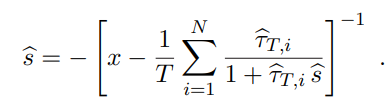

and the tau:

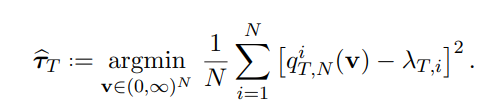

The tau is linked to the q(v), this is where I got completely lost.

It seems that I need to get the q(v) and use some solving packages to solve tau, then s(x).

I cannot understand the formula and how to solve it using python. I don't even know if I'm thinking it right.

## About this project
I did all the coding myself on the SCRP of the department mainly because yfinance is not available in mainland China and I'm not in HK this week. Happy new year btw:) The platform is really great and I found out that pynotebook is a great tool to do it. It's much more interesting to code and write in blocks. I even learned some LATEX to type formulas. 

I mainly use csv to do the IO, and I also used some .npy files to save numpy matrix. csv files can be loaded in excel so I can use excel, stata to calculate certain numbers to check if I coded them right.

I transformed all the data into matrixes and calculate them using linear algebra. I use certain packages to estimate parameters(mainly sklearn)

## References
About reference, I did all the coding myself, but I referenced a lot of materials.
I learned numpy, pandas and sklearn through internet, including google, baidu, youtube, bilibili, and manuals of these packages.
I also referenced the methods in the article on the internet and some textbooks.

### Papers:  
Fama, E. F. and K. R. French. 1993. Common risk factors in the returns on stocks and bonds.
Journal of Financial Economics 33: 3–56.  

Fan, J., Y. Liao, and M. Mincheva. 2013. Large covariance estimation by thresholding
principal orthogonal complements (with discussion). Journal of the Royal Statistical Society,
Series B 75: 603–680.  

Ledoit, O. and M. Wolf. 2004b. A well-conditioned estimator for large-dimensional covariance matrices. Journal
of Multivariate Analysis 88: 365–411. 

Ledoit, O. and M. Wolf. 2012. Nonlinear shrinkage estimation of large-dimensional covariance matrices. Annals
of Statistics 40: 1024–1060.  

Ledoit, O. and M. Wolf. 2015. Spectrum estimation: a unified framework for covariance matrix estimation and
PCA in large dimensions. Journal of Multivariate Analysis 139: 360–384

Markowitz, H. 1952. Portfolio selection. Journal of Finance 7: 77–91